# Working with NIfTI Images

NIfTI is the standard image type for medical images. 

This code is from a tutorial:
https://neuraldatascience.io/8-mri/nifti.html

## Load NIfTI file

Use `NiBabel` to read the file

In [1]:
import nibabel as nib

img = nib.load('rest.nii.gz')
type(img)

nibabel.nifti1.Nifti1Image

## View metadata

Use the image's header to print the data. Need to use `print()` to display this information

In [2]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 48
dim             : [  4  64  64  35 251   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  3.  3.  3.  2.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 34
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 96.66492
qoffset_y       : -58.083405
qoffset_z       : -16.50471
srow_x          : [-3.    

## Access data in NIfTI object

Get the data by calling a `get_fdata()`. The "f" means floating point

In [3]:
img_data = img.get_fdata()
type(img_data)

numpy.ndarray

The data is a NumPy array

In [4]:
img_data.shape

(64, 64, 35, 251)

## Visualize a slice

Plot a picture of the slice

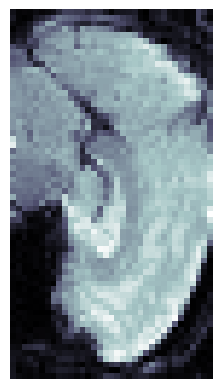

In [5]:
import matplotlib.pyplot as plt

plt.imshow(img_data[32, :, :, 0], cmap='bone')
plt.axis('off')
plt.show()

Image is rotated, so let's fix it with `ndi.rotate`

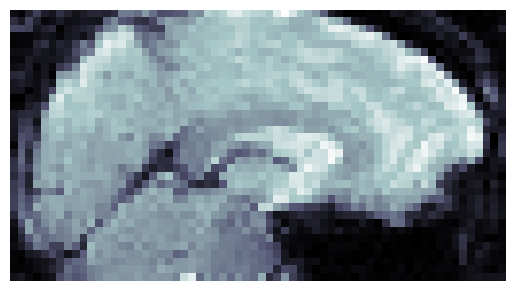

In [6]:
import scipy.ndimage as ndi

plt.imshow(ndi.rotate(img_data[32, :, :, 0], 90), cmap='bone')
plt.axis('off')
plt.show()

## Plot series of slices

Visualize what different areas of the brain look like by taking slices

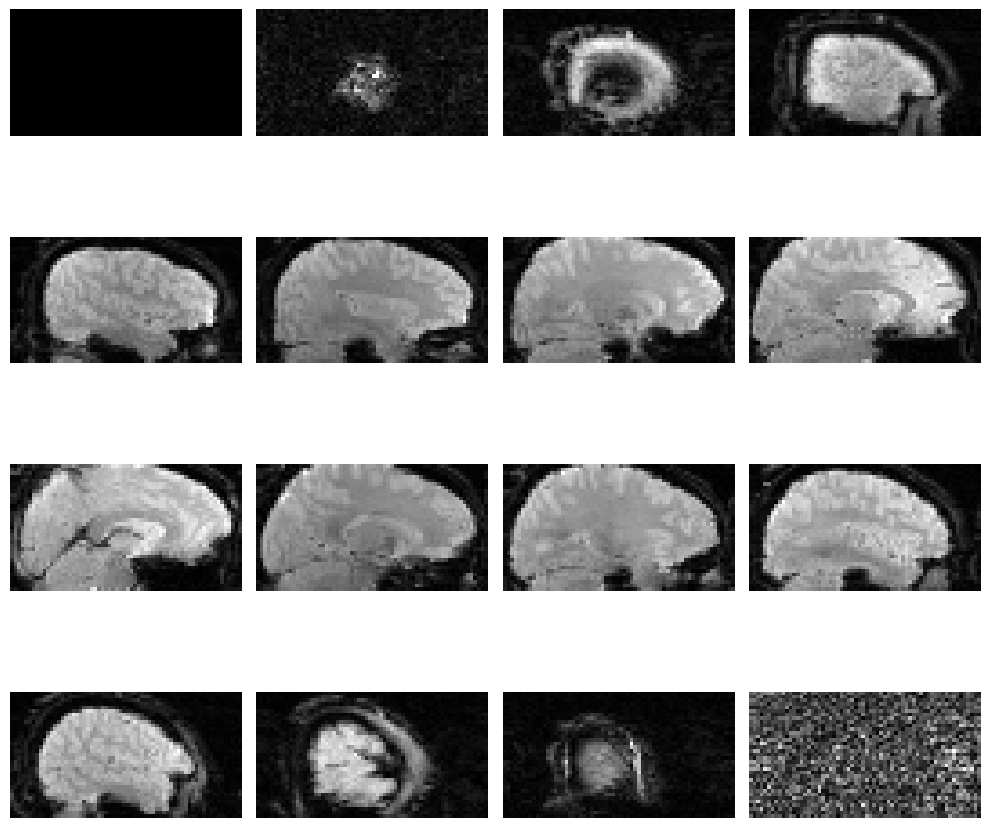

In [7]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = img_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, image in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(img_data[image, :, :, 0], 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

NiLearn is designed to work specifically with neuroimaging data.

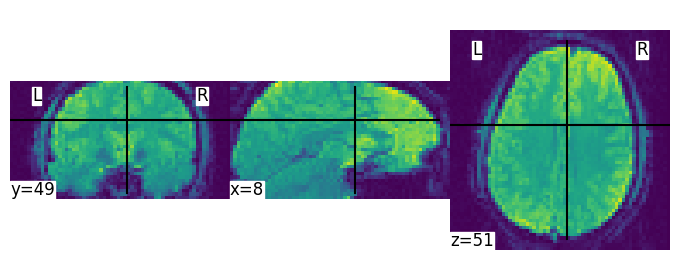

In [14]:
from nilearn import plotting

plotting.plot_img(img.slicer[:,:,:,0])
plt.show()

NiLearn uses matplotlib, so familiar tricks can be used

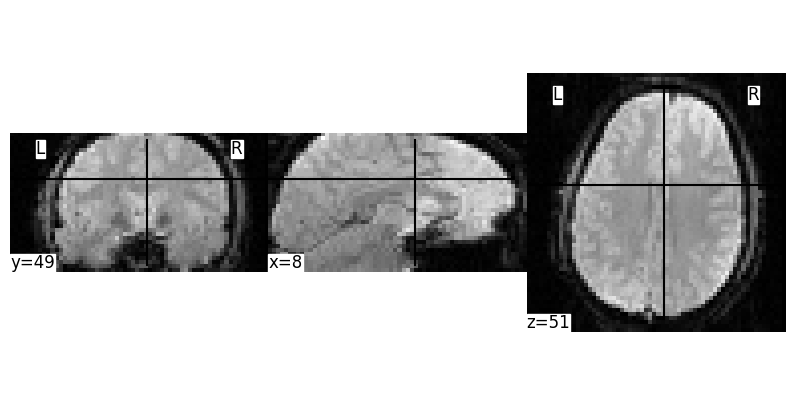

In [19]:
fig, ax = plt.subplots(figsize=[10,5])
plotting.plot_img(img.slicer[:,:,:,0], cmap='gray', axes=ax)
plt.show()

Another way to display the brain

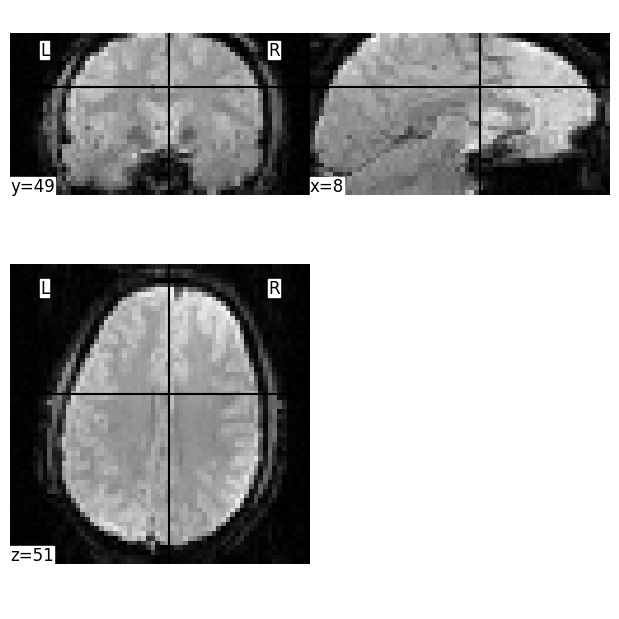

In [20]:
plotting.plot_img(img.slicer[:,:,:,0], display_mode='tiled', cmap='gray')
plt.show()

Create new center for axes

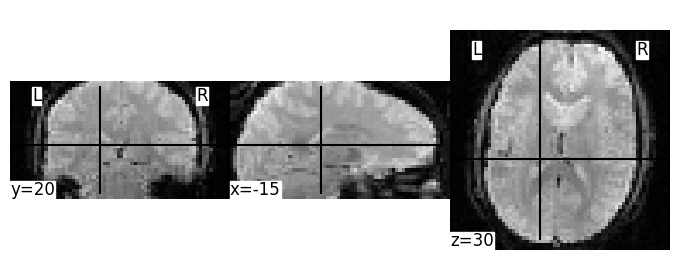

In [26]:
plotting.plot_img(img.slicer[:,:,:,0], cmap='gray', cut_coords=(-15, 20, 30))
plt.show()

Different plotting methods

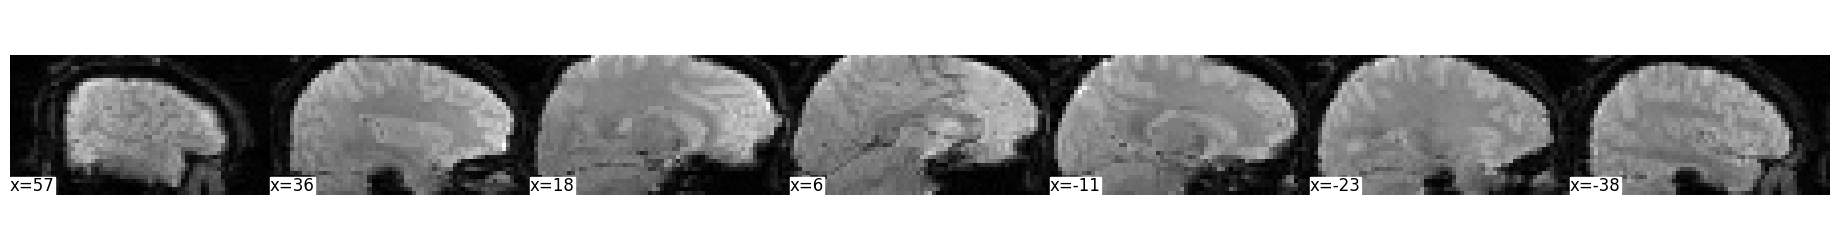

In [27]:
plotting.plot_img(img.slicer[:,:,:,0], display_mode='x', cmap='gray')
plt.show()

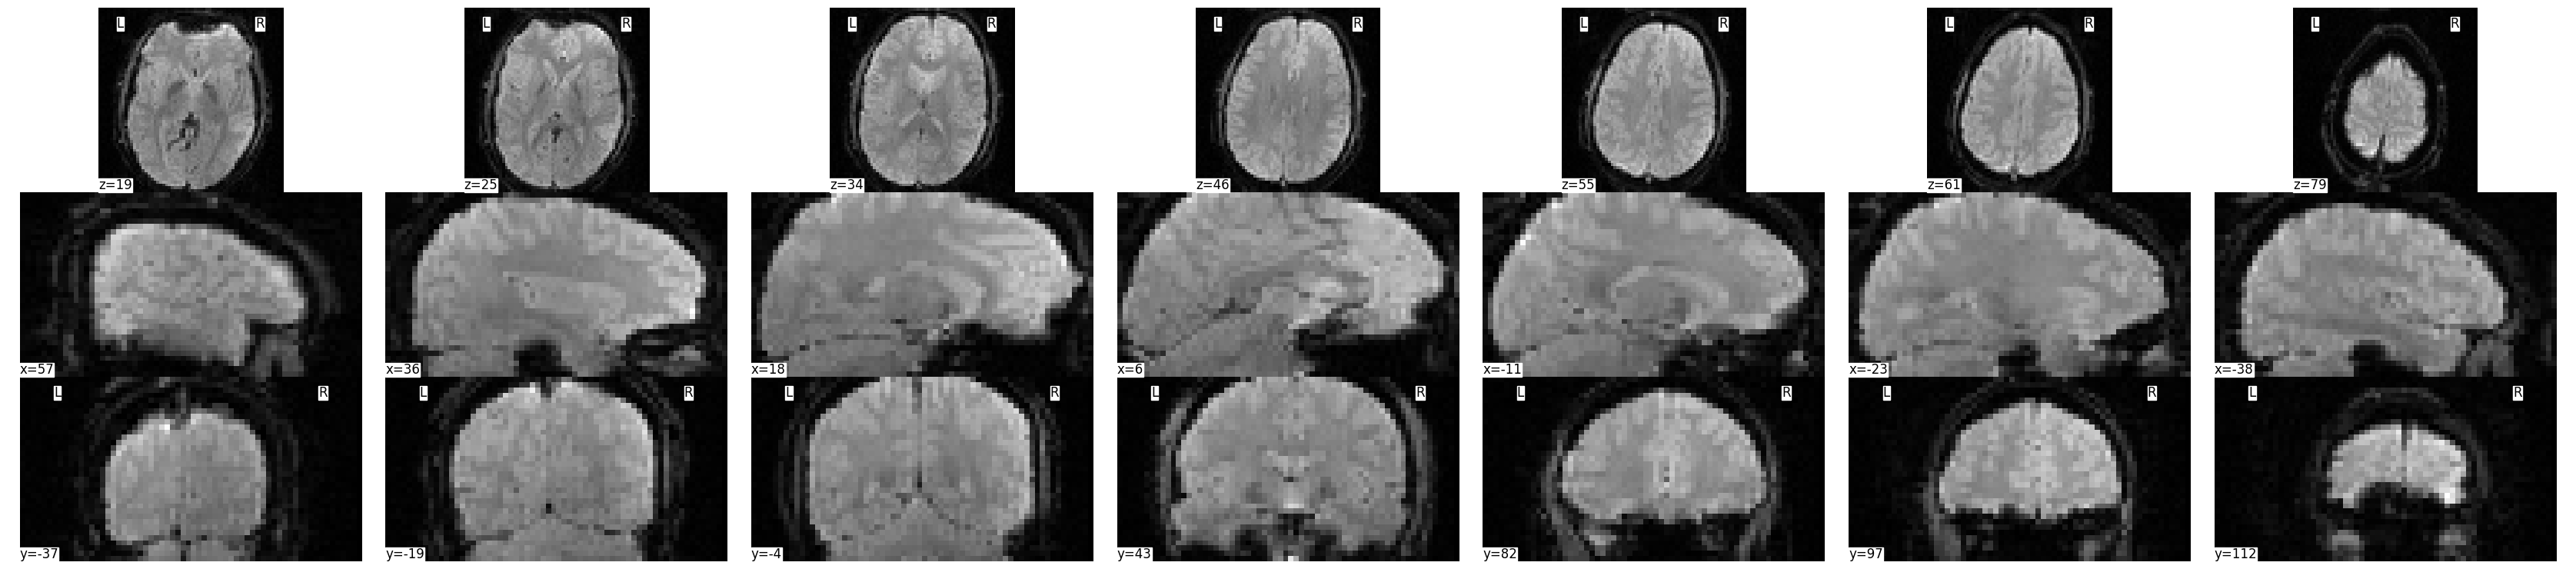

In [28]:
plotting.plot_img(img.slicer[:,:,:,0], display_mode='mosaic', cmap='gray')
plt.show()